In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
import openpyxl
excel=openpyxl.Workbook()
sheet=excel.active
sheet.title='Scraped Data USA Senate'
sheet.append(['Person_Name','State_Name','Party_Name','Vote'])
try:
    source=requests.get("https://www.senate.gov/legislative/LIS/roll_call_votes/vote1171/vote_117_1_00094.htm#state")
    source.raise_for_status()
    soup=BeautifulSoup(source.text,'html.parser')
    lists=soup.find_all('div',class_="contenttext")
    names=soup.find_all('div',class_="contenttext responsive_col")
    i=0
    while i<150 :
        k=2
        j=i+1
        while k>0:
            State_name=names[i].text.split(':')[0].strip()
            Vote=names[j].text.split(',')[1].strip()
            Person_Name=names[j].text.split(',')[0].split('(')[0].strip()
            Party_Name=names[j].text.split(',')[0].split('(')[1].split('-')[0].strip()
            sheet.append([Person_Name,State_name,Party_Name,Vote])
            k=k-1
            j=j+1
        i=i+3
    #for name in names:
     #   State_Name=name.b.text
     #   if len(State)!=3 and State!="Not Voting":
           
        
    
            
except Exception as e:
    print(e)
excel.save('USA Senate Scraped Data.xlsx')

In [3]:
import pandas as pd
ans={}

In [4]:
df = pd.DataFrame(pd.read_excel("/Users/deep/USA Senate Scraped Data.xlsx"))

In [5]:
df

,Person_Name,State_Name,Party_Name,Vote
0,Shelby,Alabama,R,Yea
1,Tuberville,Alabama,R,Yea
2,Murkowski,Alaska,R,Yea
3,Sullivan,Alaska,R,Not Voting
4,Kelly,Arizona,D,Nay
...,...,...,...,...
95,Manchin,West Virginia,D,Yea
96,Baldwin,Wisconsin,D,Nay
97,Johnson,Wisconsin,R,Yea
98,Barrasso,Wyoming,R,Yea


In [6]:
#Q.1 How many democrats did not vote?
res=df[df['Party_Name']=='D']['Vote']
cnt=0
for i in res:
    if i=='Not Voting':
        cnt=cnt+1
print(cnt)
ans[1]=cnt

0


In [7]:
#Q.2 How many republicans voted Yea?
ans[2]=df[df['Party_Name']=='R']['Vote'].value_counts()[0]
print(ans[2])

49


In [8]:
#Q.3 What's the total number of Yea votes from all senators whose name starts with "B"?
ans=(df[df['Vote']=="Yea"]['Person_Name'])
cnt=0
for i in ans:
    if i[0]=='B':
        cnt=cnt+1
print(cnt)
ans[3]=cnt

6


/Users/deep/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
/var/folders/p7/ngcssct148s8rbrbrthk7fb80000gn/T/ipykernel_48883/4221474415.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[3]=cnt


In [9]:
#Q.4 How many states voted all Yay?
Res=((df[df['Vote']=="Yea"]['State_Name']))
res=(len(set(Res)))
print(res)
ans[4]=res

29


/Users/deep/opt/anaconda3/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [10]:
#Q.5 How many states had at least 1 non-voting senator?
ans[5]=df['Vote'].value_counts()[2]

In [11]:
#Q.6 How many states have both Republican senators?
lists=df[df['Party_Name']=='R']['State_Name']
dic={}
cnt=0
for i in lists:
    if i  in dic.keys():
        dic[i]=dic[i]+1
    else:
        dic[i]=1
for i,j in dic.items():
    if j==2:
        cnt=cnt+1
print(cnt)
    
ans[6]=cnt


22


In [12]:
#Q.7 How many states have both Republican and Democrat senators?
ans[7]=(pd.get_dummies(df,columns=['Party_Name']).groupby(['State_Name']).sum()).query('Party_Name_R == 1 & Party_Name_D == 1').shape[0]

In [13]:
#Q.8 How many Senators have their names starting with W?
res=df['Person_Name']
cnt=0
for i in res:
    if i[0][0]=='W':
        cnt=cnt+1
print(cnt)
ans[8]=cnt

6


In [14]:
#Q.9 What is the votes ratio of Democrats' major decision to Republican's major decision ? 
major_decision = pd.crosstab(df['Party_Name'],df['Vote']).max(axis = 1).loc[['D','R']].values
ans[9]=round(major_decision[0] / major_decision[1],4)

In [15]:
#Q.10 What is the highest absolute difference in percentage between yea and nay senators among the different parties? 
import numpy as np
nayyea = pd.crosstab(df['Party_Name'],df['Vote']).astype(float)
ph = abs(nayyea.Yea - nayyea.Nay)/nayyea.Yea
maximum = 0
for i in ph:
    if i not in [np.nan,np.infty] and i > maximum:
        maximum = i
        
ans[10]=str(round(maximum,4)*100) + '%'

In [16]:
#Q.11 How many Democrats voted Yea?
res=df[df['Party_Name']=='D']['Vote'].value_counts()[1]
print(res)
ans[11]=res

3


In [17]:
 #Q.12 How many states voted all Nay?
tns=set(df[df['Vote']=='Nay']['State_Name'])
rem=(len(tns))
print(rem)
ans[12]=rem

26


In [18]:
# Q.13 How many states have both Democrat senators?
lists=df[df['Party_Name']=='D']['State_Name']
dic={}
cnt=0
for i in lists:
    if i  in dic.keys():
        dic[i]=dic[i]+1
    else:
        dic[i]=1
for i,j in dic.items():
    if j==2:
        cnt=cnt+1
print(cnt)
ans[13]=cnt

21


In [19]:
#Q.14 How many senators did not vote?
res=df['Vote'].value_counts()[2]
print(res)
ans[14]=res

1


In [20]:
#Q.15 How many states had at least 1 senator not voted?
res=df['Vote'].value_counts()[2]
print(res)
ans[15]=res

1


In [21]:
#Q.16 Ratio of number of rows to the number of columns in your dataset?
ratio=df.shape[0]/df.shape[1]
print(ratio)
ans[16]=ratio

25.0


In [22]:
import csv

answers = []
for i in range(1,17):
    answers.append(['Q'+str(i),ans[i]])
        

filename = "TDS_PROJECT-1.csv"

with open(filename, 'w',newline='') as csvfile:  
    csvwriter = csv.writer(csvfile,dialect='excel') 
    csvwriter.writerows(answers)

In [26]:
import pandas as pd
df=pd.read_excel("USA Senate Scraped Data.xlsx")
df

,Person_Name,State_Name,Party_Name,Vote
0,Shelby,Alabama,R,Yea
1,Tuberville,Alabama,R,Yea
2,Murkowski,Alaska,R,Yea
3,Sullivan,Alaska,R,Not Voting
4,Kelly,Arizona,D,Nay
...,...,...,...,...
95,Manchin,West Virginia,D,Yea
96,Baldwin,Wisconsin,D,Nay
97,Johnson,Wisconsin,R,Yea
98,Barrasso,Wyoming,R,Yea


In [33]:
import matplotlib.pyplot as plt
  
# create data
x = ['D','R']
df[df['Party_Name']=='D']['Vote'].value_counts()



Nay    45
Yea     3
Name: Vote, dtype: int64

In [34]:
df[df['Party_Name']=='R']['Vote'].value_counts()

Yea           49
Not Voting     1
Name: Vote, dtype: int64

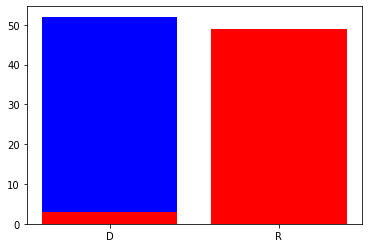

In [35]:
y1 = [3, 49]
y2 = [49, 0]
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

Text(0, 0.5, 'No_of_Votes')

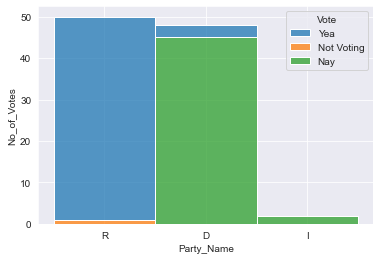

In [39]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.histplot(x='Party_Name',hue='Vote',multiple='stack',data=df)
plt.ylabel('No_of_Votes')

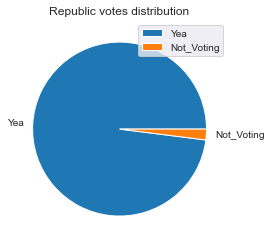

In [43]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([49,1])
mylabels = ["Yea","Not_Voting"]

plt.pie(y, labels = mylabels)
plt.title('Republic votes distribution')
plt.legend()
plt.show()

In [62]:
crosstable=pd.crosstab(df['Party_Name'],df['Vote'])
crosstable

Vote,Nay,Not Voting,Yea
Party_Name,,,
D,45,0,3
I,2,0,0
R,0,1,49


In [63]:
crosstable.style.background_gradient(cmap='viridis')

Vote,Nay,Not Voting,Yea
Party_Name,,,
D,45,0,3
I,2,0,0
R,0,1,49


<AxesSubplot:xlabel='Vote', ylabel='Party_Name'>

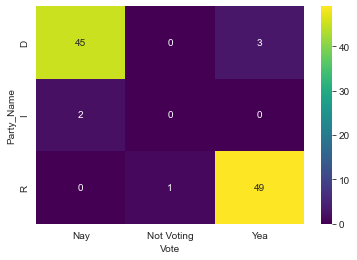

In [64]:
sns.heatmap(crosstable,annot=True,cmap='viridis')

In [65]:
df

,Person_Name,State_Name,Party_Name,Vote
0,Shelby,Alabama,R,Yea
1,Tuberville,Alabama,R,Yea
2,Murkowski,Alaska,R,Yea
3,Sullivan,Alaska,R,Not Voting
4,Kelly,Arizona,D,Nay
...,...,...,...,...
95,Manchin,West Virginia,D,Yea
96,Baldwin,Wisconsin,D,Nay
97,Johnson,Wisconsin,R,Yea
98,Barrasso,Wyoming,R,Yea


In [74]:

lists=df[df['Party_Name']=='D']['State_Name']
dic={}
cnt1=0
for i in lists:
    if i  in dic.keys():
        dic[i]=dic[i]+1
    else:
        dic[i]=1
for i,j in dic.items():
    if j==2:
        cnt1=cnt1+1
print("Democratic Dominition:",cnt1)
lists=df[df['Party_Name']=='R']['State_Name']
dic={}
cnt2=0
for i in lists:
    if i  in dic.keys():
        dic[i]=dic[i]+1
    else:
        dic[i]=1
for i,j in dic.items():
    if j==2:
        cnt2=cnt2+1
        
print("Republic Dominition:",cnt2)

Democratic Dominition: 21
Republic Dominition: 22


In [59]:
res=len(set(df['State_Name']))
print(res-cnt1-cnt2)

7


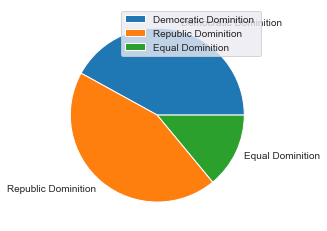

In [61]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([21, 22, 7])
mylabels = ["Democratic Dominition ", "Republic Dominition", "Equal Dominition"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

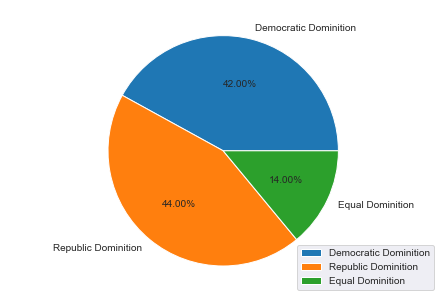

In [67]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Democratic Dominition', 'Republic Dominition', 'Equal Dominition']
students = [21,22,7]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.legend()
plt.show()